In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from matplotlib import rcParams
from sklearn.ensemble import RandomForestClassifier

In [2]:
sc = StandardScaler()

In [3]:
df= pd.read_csv('heart.csv')

In [4]:
df = df.head(918)

In [5]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
x = df[['Age', 'Sex','ChestPainType', 'RestingBP' ,'Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']]

In [7]:
x.shape

(918, 11)

In [8]:
y=df['HeartDisease']

In [9]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [10]:
df.info

<bound method DataFrame.info of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisea

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
cp = x['ChestPainType']

In [13]:
cp = pd.get_dummies(df.ChestPainType) 

In [14]:
cp = cp.head(918)

In [15]:
cp.shape

(918, 4)

In [16]:
x= x.drop('ChestPainType', axis =1)

In [17]:
x.shape

(918, 10)

In [18]:
X = pd.concat([x , cp],True)

/var/folders/xb/gf4tl3zx16vcxy697lhj0sy40000gn/T/ipykernel_32885/46834324.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  X = pd.concat([x , cp],True)


In [19]:
X.shape

(918, 14)

In [20]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


/opt/homebrew/Caskroom/miniforge/base/envs/tf2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

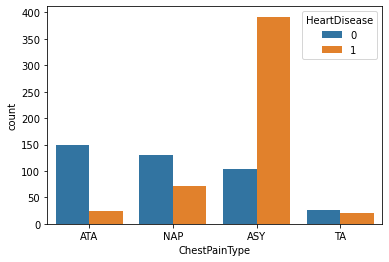

In [21]:
sns.countplot(df['ChestPainType'], hue = df['HeartDisease']) 
#we can see that TA and NAP are not that helpful features so we can remove them after making columns.

In [22]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [23]:
RECG=LabelEncoder()

In [24]:
recg = RECG.fit_transform(X['RestingECG'])

In [25]:
recg.dtype

dtype('int64')

In [26]:
recg= recg.reshape(-1,1)

In [27]:
RestingECG = recg

In [28]:
X['RestingECG'].shape

(918,)

In [29]:
 RestingECG

array([[1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [30]:
CPT = LabelEncoder()

In [31]:
X['RestingECG']= recg

In [32]:
RestingECG = recg

In [33]:
RestingECG.shape

(918, 1)

In [34]:
df['RestingECG']= RestingECG

In [35]:
df1 = df['RestingECG']

In [36]:
X

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ASY,ATA,NAP,TA
0,40,M,140,289,0,1,172,N,0.0,Up,0,1,0,0
1,49,F,160,180,0,1,156,N,1.0,Flat,0,0,1,0
2,37,M,130,283,0,2,98,N,0.0,Up,0,1,0,0
3,48,F,138,214,0,1,108,Y,1.5,Flat,1,0,0,0
4,54,M,150,195,0,1,122,N,0.0,Up,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,110,264,0,1,132,N,1.2,Flat,0,0,0,1
914,68,M,144,193,1,1,141,N,3.4,Flat,1,0,0,0
915,57,M,130,131,0,1,115,Y,1.2,Flat,1,0,0,0
916,57,F,130,236,0,0,174,N,0.0,Flat,0,1,0,0


In [37]:
EX = LabelEncoder()

In [38]:
m = EX.fit_transform(X['Sex'])

In [39]:
Sex = m

In [40]:
X['Sex']= Sex

In [41]:
Exe = X['ExerciseAngina']

In [42]:
Exercise = EX.fit_transform(Exe)

In [43]:
ExA= EX.fit_transform(Exe)

In [44]:
ExerciseAngina = ExA

In [45]:
X['ExerciseAngina']= ExerciseAngina

In [46]:
X.dtypes

Age                 int64
Sex                 int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope           object
ASY                 uint8
ATA                 uint8
NAP                 uint8
TA                  uint8
dtype: object

In [47]:
y.dtype

dtype('int64')

In [48]:
X['Sex']  

0      1
1      0
2      1
3      0
4      1
      ..
913    1
914    1
915    1
916    0
917    1
Name: Sex, Length: 918, dtype: int64

In [49]:
#import matplotlib.pyplot as plt

In [50]:
#plt.scatter(X['Cholesterol'],y)

In [51]:
X = X.drop('ST_Slope', axis = 1)

In [52]:
X= X.drop('TA' , axis = 1)
X = X.drop('NAP' , axis = 1)

In [53]:
X

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ASY,ATA
0,40,1,140,289,0,1,172,0,0.0,0,1
1,49,0,160,180,0,1,156,0,1.0,0,0
2,37,1,130,283,0,2,98,0,0.0,0,1
3,48,0,138,214,0,1,108,1,1.5,1,0
4,54,1,150,195,0,1,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,1,132,0,1.2,0,0
914,68,1,144,193,1,1,141,0,3.4,1,0
915,57,1,130,131,0,1,115,1,1.2,1,0
916,57,0,130,236,0,0,174,0,0.0,0,1


In [54]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [55]:
sns.set()

/opt/homebrew/Caskroom/miniforge/base/envs/tf2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

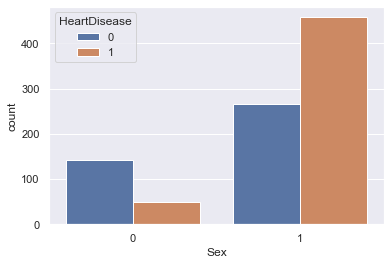

In [56]:
sns.countplot(X['Sex'], hue = y) 
#girls(0) in the dataset have low chances of having disease an boys have more as it can be identified by graphs so it is valid feature.

In [57]:
X

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ASY,ATA
0,40,1,140,289,0,1,172,0,0.0,0,1
1,49,0,160,180,0,1,156,0,1.0,0,0
2,37,1,130,283,0,2,98,0,0.0,0,1
3,48,0,138,214,0,1,108,1,1.5,1,0
4,54,1,150,195,0,1,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,1,132,0,1.2,0,0
914,68,1,144,193,1,1,141,0,3.4,1,0
915,57,1,130,131,0,1,115,1,1.2,1,0
916,57,0,130,236,0,0,174,0,0.0,0,1


In [58]:
slope =pd.DataFrame(df['ST_Slope'])


In [59]:
X = pd.concat([slope , X] , axis =1)

In [60]:
X

,ST_Slope,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ASY,ATA
0,Up,40,1,140,289,0,1,172,0,0.0,0,1
1,Flat,49,0,160,180,0,1,156,0,1.0,0,0
2,Up,37,1,130,283,0,2,98,0,0.0,0,1
3,Flat,48,0,138,214,0,1,108,1,1.5,1,0
4,Up,54,1,150,195,0,1,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,Flat,45,1,110,264,0,1,132,0,1.2,0,0
914,Flat,68,1,144,193,1,1,141,0,3.4,1,0
915,Flat,57,1,130,131,0,1,115,1,1.2,1,0
916,Flat,57,0,130,236,0,0,174,0,0.0,0,1


/opt/homebrew/Caskroom/miniforge/base/envs/tf2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

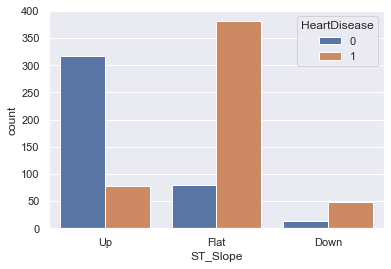

In [61]:
sns.countplot(X['ST_Slope'], hue = y) 


hence above in X , ST_Slope also plays a major role in identifying heart disease so this is also a valid feature.

<AxesSubplot:>

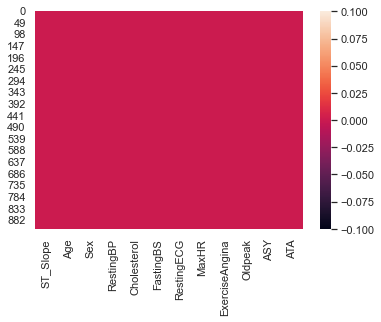

In [62]:
sns.heatmap(X.isnull()) # to check the null areas in dset.

In [63]:
X

,ST_Slope,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ASY,ATA
0,Up,40,1,140,289,0,1,172,0,0.0,0,1
1,Flat,49,0,160,180,0,1,156,0,1.0,0,0
2,Up,37,1,130,283,0,2,98,0,0.0,0,1
3,Flat,48,0,138,214,0,1,108,1,1.5,1,0
4,Up,54,1,150,195,0,1,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,Flat,45,1,110,264,0,1,132,0,1.2,0,0
914,Flat,68,1,144,193,1,1,141,0,3.4,1,0
915,Flat,57,1,130,131,0,1,115,1,1.2,1,0
916,Flat,57,0,130,236,0,0,174,0,0.0,0,1


In [64]:
x = LabelEncoder()

In [65]:
Slope = EX.fit_transform(X['ST_Slope'])

In [66]:
X['ST_Slope'] = Slope

In [67]:
X

,ST_Slope,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ASY,ATA
0,2,40,1,140,289,0,1,172,0,0.0,0,1
1,1,49,0,160,180,0,1,156,0,1.0,0,0
2,2,37,1,130,283,0,2,98,0,0.0,0,1
3,1,48,0,138,214,0,1,108,1,1.5,1,0
4,2,54,1,150,195,0,1,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,45,1,110,264,0,1,132,0,1.2,0,0
914,1,68,1,144,193,1,1,141,0,3.4,1,0
915,1,57,1,130,131,0,1,115,1,1.2,1,0
916,1,57,0,130,236,0,0,174,0,0.0,0,1


In [68]:
X= X.drop('RestingECG', axis = 1)

<AxesSubplot:>

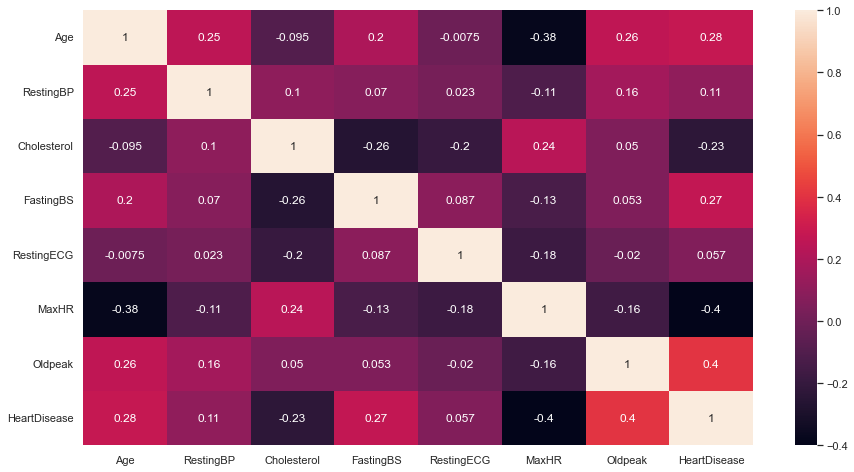

In [69]:
rcParams['figure.figsize'] = 15,8
sns.heatmap(df.corr(), annot = True)
#1 signifies that a feature is fully correlated with itself and lower the number lower the correlation.

In [70]:
xTrain,xTest,yTrain,yTest = train_test_split(X,y , test_size = 0.30)

In [71]:
xTrain = sc.fit_transform(xTrain)

In [118]:
model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')

In [119]:
model.fit(xTrain,yTrain)

RandomForestClassifier(criterion='entropy')

In [120]:
xTest = sc.fit_transform(xTest)

In [121]:
yPred = model.predict(xTest)

In [122]:
yPred.size

276

In [123]:
metrics.mean_absolute_error(yTest, yPred) 
#to be minimized . last : 0.31( without scaling ) 0.15(with scaling) 

0.14855072463768115

In [124]:
yPred

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1])

In [125]:
accuracy_score(yPred, yTest)

0.8514492753623188

In [126]:
yTest.value_counts()

1    150
0    126
Name: HeartDisease, dtype: int64

Text(0, 0.5, 'RestingBP')

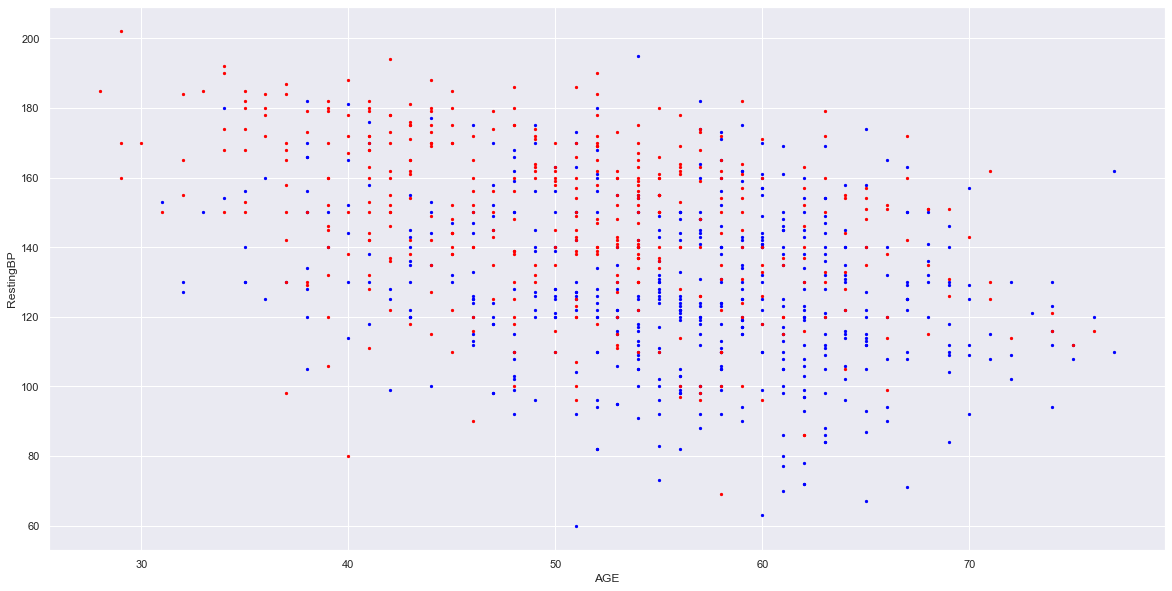

In [127]:
plt.figure(figsize = (20,10))
plt.scatter(X.Age[y==1] , X.MaxHR[y==1], s=5, c='blue' )
plt.scatter(X.Age[y==0] , X.MaxHR[y==0], s=5,c='red')

plt.xlabel('AGE')
plt.ylabel('RestingBP')

In above diagram we can see that blue are the ones with diseases and red are not.

In [128]:
confusion_matrix(yPred,yTest) 
#88 Model predicted Right. TP
#28: Model predicted 1 but the test value is 0. FN
#25: Model predicted 0 but the test value is 1. FP
#135: Neither model predicted 0 nor test values are 0. TN

array([[ 95,  10],
       [ 31, 140]])

after  graphically feature selection, we can see the difference between the prev result and current result. 